In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [10]:
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()

lines

['#Column A: Day of the year\n',
 '#Column B: Time in hours:minutes\n',
 '#Column B: Tide Height in feet\n',
 ' 1  8:07  6.57\n',
 ' 1 15:37 -0.39\n',
 ' 2  8:55  5.38\n',
 ' 2 16:25 -1.74\n',
 ' 3  9:45  5.26\n',
 ' 3 17:14 -1.36\n',
 ' 4 10:35  4.13\n',
 ' 4 18:00 -1.15\n',
 ' 5 11:28  3.48\n',
 ' 5 18:46 -1.61\n',
 ' 6 12:22  2.62\n',
 ' 6 19:31  0.05\n',
 ' 7 13:24  1.83\n',
 ' 7 20:16  1.01\n',
 ' 8  3:22  3.57\n',
 ' 8 21:01  0.73\n',
 ' 9  4:07  4.54\n',
 ' 9 21:46  2.17\n',
 '10  4:50  3.76\n',
 '10 11:58  2.88\n',
 '11  5:31  3.90\n',
 '11 12:56  1.92\n',
 '12  6:08  4.73\n',
 '12 13:45  1.74\n',
 '13  6:47  5.66\n',
 '13 14:25  0.79\n',
 '14  7:22  5.33\n',
 '14 15:00 -0.04\n',
 '15  7:59  5.23\n',
 '15 15:34 -1.12\n',
 '16  8:34  6.67\n',
 '16 16:08 -0.61\n',
 '17  9:10  4.74\n',
 '17 16:41 -0.93\n',
 '18  9:45  4.69\n',
 '18 17:12 -1.29\n',
 '19 10:21  4.20\n',
 '19 17:45  0.22\n',
 '20 10:57  3.68\n',
 '20 18:15  0.26\n',
 '21 11:38  2.47\n',
 '21 18:48  0.36\n',
 '22 12:2

In [11]:
data = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype = "str")
data

array([['1', '8:07', '6.57'],
       ['1', '15:37', '-0.39'],
       ['2', '8:55', '5.38'],
       ['2', '16:25', '-1.74'],
       ['3', '9:45', '5.26'],
       ['3', '17:14', '-1.36'],
       ['4', '10:35', '4.13'],
       ['4', '18:00', '-1.15'],
       ['5', '11:28', '3.48'],
       ['5', '18:46', '-1.61'],
       ['6', '12:22', '2.62'],
       ['6', '19:31', '0.05'],
       ['7', '13:24', '1.83'],
       ['7', '20:16', '1.01'],
       ['8', '3:22', '3.57'],
       ['8', '21:01', '0.73'],
       ['9', '4:07', '4.54'],
       ['9', '21:46', '2.17'],
       ['10', '4:50', '3.76'],
       ['10', '11:58', '2.88'],
       ['11', '5:31', '3.90'],
       ['11', '12:56', '1.92'],
       ['12', '6:08', '4.73'],
       ['12', '13:45', '1.74'],
       ['13', '6:47', '5.66'],
       ['13', '14:25', '0.79'],
       ['14', '7:22', '5.33'],
       ['14', '15:00', '-0.04'],
       ['15', '7:59', '5.23'],
       ['15', '15:34', '-1.12'],
       ['16', '8:34', '6.67'],
       ['16', '16:08', '-0.61']

In [12]:
day, time, tide = [],[],[]
mainDict = dict()

for d in data:
        day = np.append(day, int(d[0]), axis=None)
        time = np.append(time, d[1], axis=None)
        tide = np.append(tide, float(d[2]), axis=None)

        if int(d[0]) not in mainDict.keys():
                mainDict[int(d[0])] = [(d[1], float(d[2]))]
        else:
                mainDict[int(d[0])].append((d[1],float(d[2])))



In [13]:
highTideVals, lowTideVals, diff = [],[], []

for d in mainDict.values():
    highTideVals.append(d[0][1])
    lowTideVals.append(d[1][1])
    diff.append(d[0][1] - d[1][1])

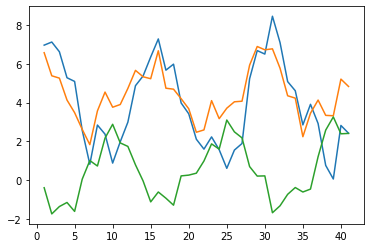

In [94]:
fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(mainDict.keys(), diff)
plt.plot(mainDict.keys(), highTideVals)
plt.plot(mainDict.keys(), lowTideVals)

In [81]:
frac = []
i = 0
for t, x in zip(time, day):
    new = t.split(':')
    frac.append(x + (float(new[0])/24 + float(new[1]) /1440))

frac = np.array(frac)
tide = np.array(tide)
frac

array([ 1.33819444,  1.65069444,  2.37152778,  2.68402778,  3.40625   ,
        3.71805556,  4.44097222,  4.75      ,  5.47777778,  5.78194444,
        6.51527778,  6.81319444,  7.55833333,  7.84444444,  8.14027778,
        8.87569444,  9.17152778,  9.90694444, 10.20138889, 10.49861111,
       11.22986111, 11.53888889, 12.25555556, 12.57291667, 13.28263889,
       13.60069444, 14.30694444, 14.625     , 15.33263889, 15.64861111,
       16.35694444, 16.67222222, 17.38194444, 17.69513889, 18.40625   ,
       18.71666667, 19.43125   , 19.73958333, 20.45625   , 20.76041667,
       21.48472222, 21.78333333, 22.51736111, 22.80555556, 23.09861111,
       23.82777778, 24.12361111, 24.85416667, 25.15069444, 25.44722222,
       26.18263889, 26.49652778, 27.21875   , 27.53958333, 28.25625   ,
       28.57638889, 29.29513889, 29.61041667, 30.33194444, 30.64375   ,
       31.36805556, 31.67361111, 32.40277778, 32.70277778, 33.4375    ,
       33.73194444, 34.47152778, 34.75833333, 35.50694444, 35.78

In [91]:
def oscicllationFunc(x, a, b, c):
    return a*np.sin(b*x)+c

In [118]:
popt, popc = curve_fit(oscicllationFunc, frac, tide, bounds=(3,[1000, 1000, 1000]))

In [119]:
popt

array([  3.        , 501.44002817,   3.        ])

Text(0, 0.5, 'Tide Height')

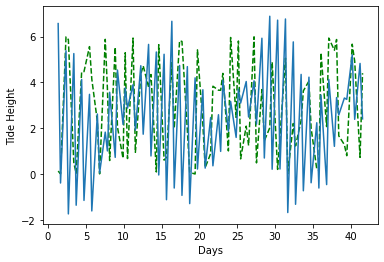

In [120]:
newFig = plt.figure()
newFig.patch.set_facecolor('white')
#newFig.subplots_adjust(bottom=0.6)
plt.plot(frac, oscicllationFunc(frac, *popt), 'g--')
plt.plot(frac, tide)
plt.xlabel('Days')
plt.ylabel('Tide Height')